In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [49]:
def open_blocks_data():
    df_blockstats_daily_mean = pd.read_csv('/home/moises/Data_BTC_thesis/df_blockstats_daily_mean.csv')
    for col in df_blockstats_daily_mean.columns:
        #transformar em float
        try:
            df_blockstats_daily_mean[col] = df_blockstats_daily_mean[col].astype(float)
        except:
            print(col)
            pass
        
    df_blockstats_daily_mean["GMT"] = pd.to_datetime(df_blockstats_daily_mean["GMT"])
    df_blockstats_daily_mean["Date"] = pd.to_datetime(df_blockstats_daily_mean["Date"])
    df_blockstats_daily_mean.set_index("GMT", inplace=True)
    return df_blockstats_daily_mean
df_blockstats_daily_mean = open_blocks_data()

def open_prices_data():
    # Main resource of bitcoin price is the data from ccxt 
    #import df_price_btc_usd_agregate.csv
    df_price_btc_usd_agregate = pd.read_csv("/home/moises/Data_BTC_thesis/df_price_btc_usd_agregate.csv")
    #convert the Date column to datetime
    df_price_btc_usd_agregate["Date"] = pd.to_datetime(df_price_btc_usd_agregate["Date"])
    #set the Date column as index
    #df_price_btc_usd_agregate.set_index("Date", inplace=True)
    btc_price_data = df_price_btc_usd_agregate 
    btc_price_data["Close"] = btc_price_data["Close"].astype(float)
    #set the Date column as index
    btc_price_data.set_index("Date", inplace=True)

    return btc_price_data
btc_price_data = open_prices_data()


dict_col_names = {col:{"log":True, "ylabel":True } for col in df_blockstats_daily_mean.columns} 
dict_col_names["avgfee"] = {"log":True, "ylabel":"sats"}
dict_col_names["avgfeerate"] = {"log":True, "ylabel":"sats/vbyte"}
dict_col_names["avgtxsize"] = {"log":True, "ylabel":"bytes"}
dict_col_names["blockhash"] = {"log":True, "ylabel":None}
dict_col_names["feerate_percentiles"] = {"log":True, "ylabel":None}
dict_col_names["height"] = {"log":True, "ylabel":None}
dict_col_names["ins"] = {"log":False, "ylabel":None}
dict_col_names["maxfee"] = {"log":True, "ylabel":"sats"}
dict_col_names["maxfeerate"] = {"log":True, "ylabel":"sats/vbyte"}
dict_col_names["maxtxsize"] = {"log":False, "ylabel":"bytes"}
dict_col_names["medianfee"] = {"log":True, "ylabel":"sats"}
dict_col_names["mediantime"] = {"log":True, "ylabel":None}
dict_col_names["mediantxsize"] = {"log":True, "ylabel":"bytes"}    
dict_col_names["minfee"] = {"log":True, "ylabel":"sats"}
dict_col_names["minfeerate"] = {"log":True, "ylabel":"sats/vbyte"}
dict_col_names["mintxsize"] = {"log":True, "ylabel":"bytes"}
dict_col_names["outs"] = {"log":False, "ylabel":None}
dict_col_names["subsidy"] = {"log":True, "ylabel":"sats"}
dict_col_names["swtotal_size"] = {"log":False, "ylabel":"bytes"}
dict_col_names["swtotal_weight"] = {"log":False, "ylabel":"wu"}
dict_col_names["swtxs"] = {"log":False, "ylabel":None}
dict_col_names["time"] = {"log":True, "ylabel":None}
dict_col_names["total_out"] = {"log":True, "ylabel":"sats"}
dict_col_names["total_size"] = {"log":False, "ylabel":"bytes"}
dict_col_names["total_weight"] = {"log":False, "ylabel":"wu"}
dict_col_names["totalfee"] = {"log":True, "ylabel":"sats"}
dict_col_names["txs"] = {"log":False, "ylabel":None}
dict_col_names["utxo_increase"] = {"log":False, "ylabel":None}
dict_col_names["utxo_size_inc"] = {"log":False, "ylabel":None}
dict_col_names["utxo_size_inc_actual"] = {"log":False, "ylabel":None}
dict_col_names["GMT"] = {"log":True, "ylabel":None}
dict_col_names["year"] = {"log":True, "ylabel":None}
dict_col_names["avgfee_btc"] = {"log":True, "ylabel":"BTC"}
dict_col_names["maxfee_btc"] = {"log":True, "ylabel":"BTC"}
dict_col_names["minfee_btc"] = {"log":True, "ylabel":"BTC"}
dict_col_names["subsidy_btc"] = {"log":True, "ylabel":"BTC"}
dict_col_names["blockhash_decimal"] = {"log":True, "ylabel":None}


list_fee_names = ["avgfee", "avgfeerate", "maxfee", "maxfeerate", "medianfee", "minfee", "minfeerate", "totalfee"]
list_size_names = ["avgtxsize", "maxtxsize", "mediantxsize", "mintxsize", "swtotal_size", "swtotal_weight", "total_size", "total_weight"]
list_count_names = ["ins", "outs", "swtxs", "txs", "utxo_increase", "utxo_size_inc", "utxo_size_inc_actual"]
list_time_names = ["time", "mediantime"]
list_subsidy_names = ["subsidy", "subsidy_btc"]
list_block_names = ["blockhash", "blockhash_decimal", "height", "year", "GMT"]
list_other_names = ["feerate_percentiles"]
 



GMT
Date


In [50]:
# show duplicated dates btc_price_data
print(btc_price_data[btc_price_data.index.duplicated()])

Empty DataFrame
Columns: [Close]
Index: []


In [43]:
btc_price_data

,Close
Date,
2009-01-09,0.000000
2009-01-10,0.000000
2009-01-11,0.000000
2009-01-12,0.000000
2009-01-13,0.000000
...,...
2023-07-27,29312.836826
2023-07-28,29358.839335
2023-07-29,29268.279610


In [12]:


#calculate cross correlation
sm.tsa.stattools.ccf(btc_price_data_copy["Close"].values, btc_price_data_copy["Close"].values, adjusted=False)



array([ 1.00000000e+00,  9.98810252e-01,  9.97686967e-01, ...,
       -4.96968753e-04, -3.32326565e-04, -1.68038032e-04])

TypeError: 'method' object is not iterable

In [29]:
# interpolate the data to fill the missing values with the 0 value
btc_price_data_copy = btc_price_data.interpolate(method='linear', limit_direction='forward', axis=0)

In [38]:
btc_price_data

,Close
Date,
2009-01-09,0.000000
2009-01-10,0.000000
2009-01-11,0.000000
2009-01-12,0.000000
2009-01-13,0.000000
...,...
2023-07-27,29312.836826
2023-07-28,29358.839335
2023-07-29,29268.279610


In [37]:
btc_price_data_copy

,Close
Date,
2009-01-09,0.000000
2009-01-10,0.000000
2009-01-11,0.000000
2009-01-12,0.000000
2009-01-13,0.000000
...,...
2023-07-27,29312.836826
2023-07-28,29358.839335
2023-07-29,29268.279610


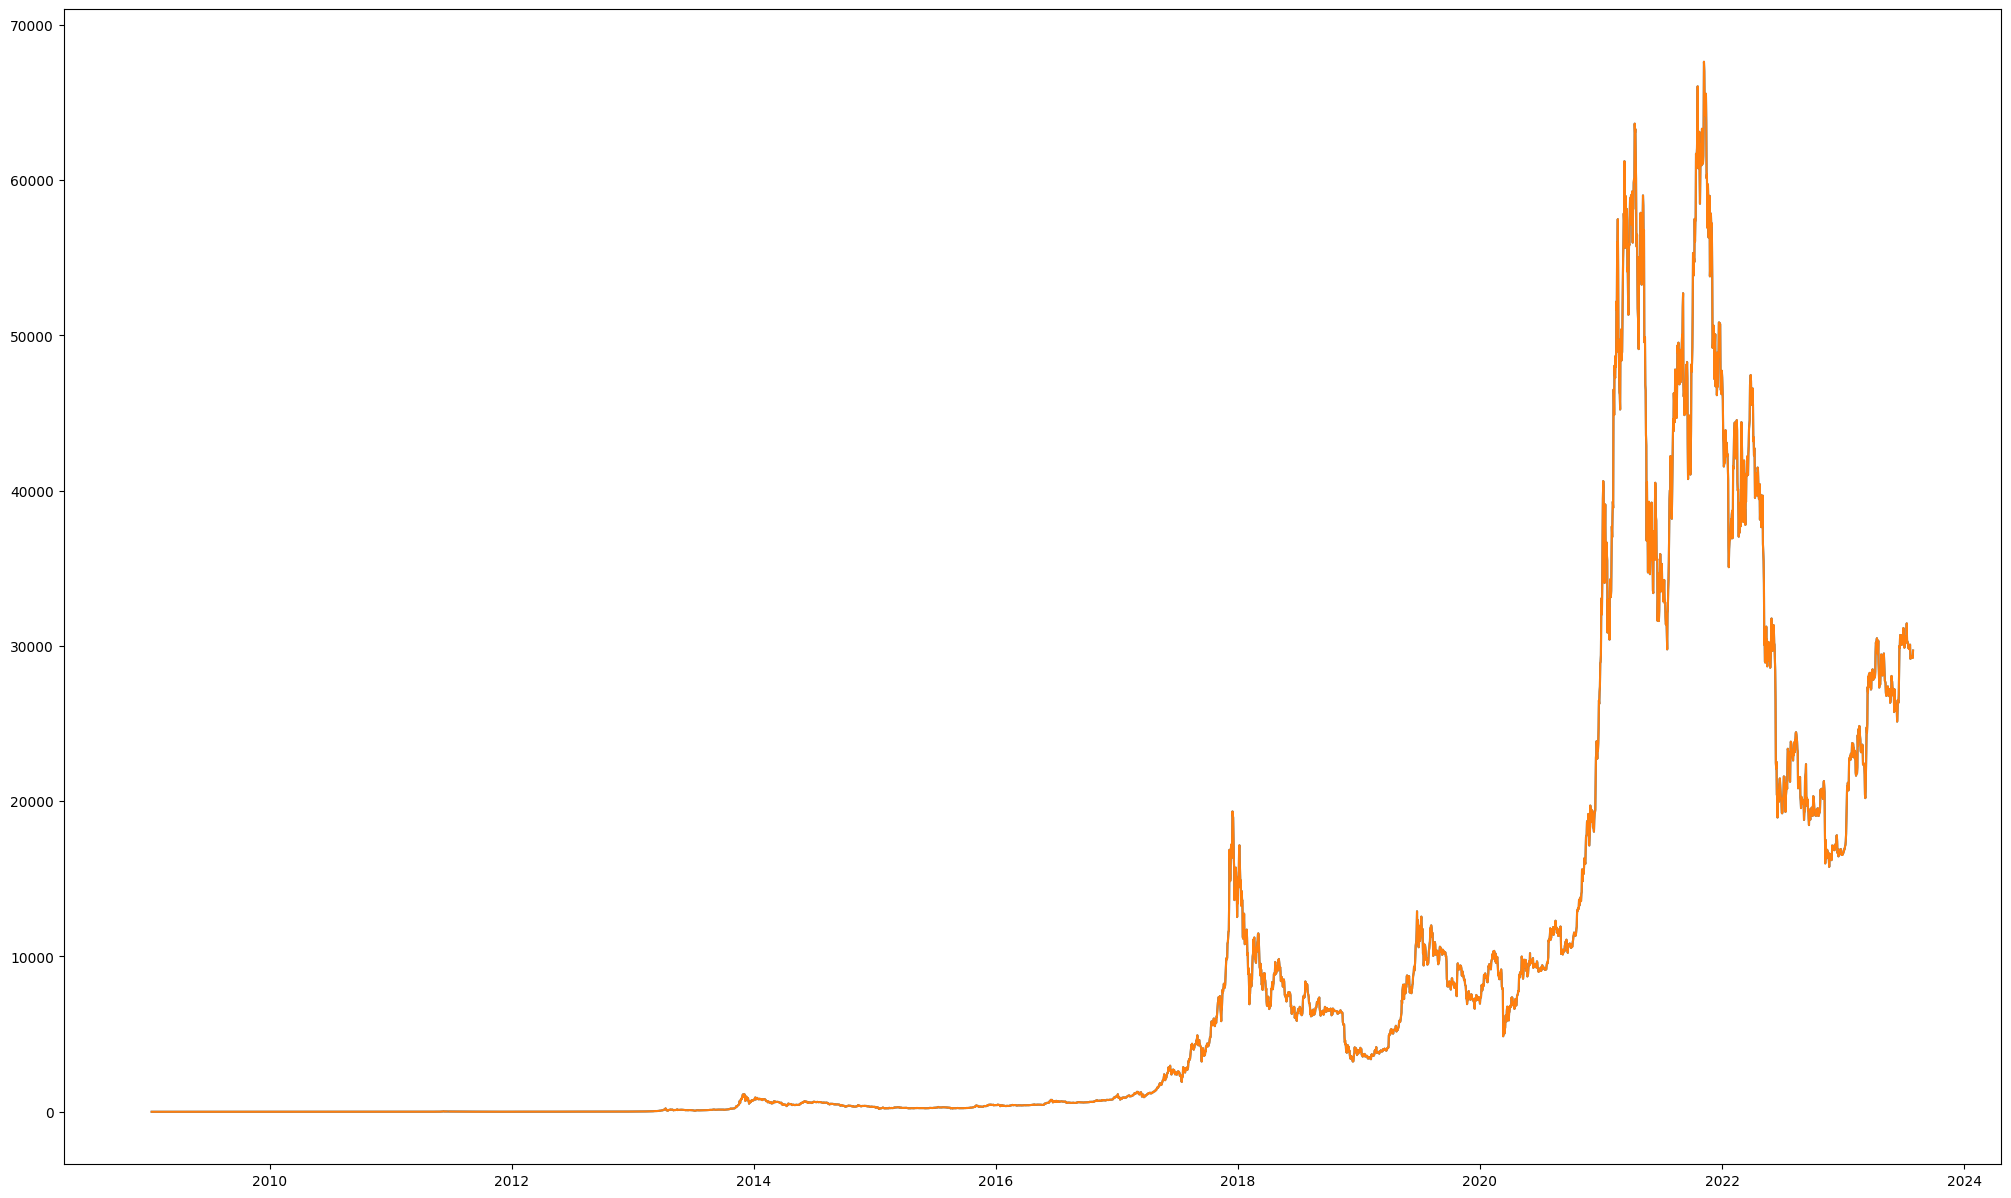

In [18]:
#plot the data to see the missing values filled
plt.figure(figsize=(25,15))
plt.plot(btc_price_data_copy["Close"])
plt.plot(btc_price_data["Close"])
plt.show()


In [ ]:
#plot btc_price_data and btc_price_data_copy


In [65]:
btc_price_data_copy.isna().sum()

Close    0
dtype: int64

In [63]:
a = btc_price_data[btc_price_data["Close"].isna()].copy

btc_price_data[btc_price_data.index == "2011-06-19"]["Close"].values

#insert a value for all close values in the a dataframe
a["Close"] = btc_price_data[btc_price_data.index == "2011-06-19"]["Close"].values


TypeError: 'method' object does not support item assignment

In [39]:
btc_price_data_copy

,Close
Date,
2009-01-09,0.000000
2009-01-10,0.000000
2009-01-11,0.000000
2009-01-12,0.000000
2009-01-13,0.000000
...,...
2023-07-27,29312.836826
2023-07-28,29358.839335
2023-07-29,29268.279610


In [44]:
#save csv file btc_price_data_copy as df_price_btc_usd_agregate.csv
btc_price_data_copy.to_csv("/home/moises/Data_BTC_thesis/df_price_btc_usd_agregate_2.csv")

In [19]:
close_series = btc_price_data_copy
close_series

,Close
Date,
2009-01-09,0.000000
2009-01-10,0.000000
2009-01-11,0.000000
2009-01-12,0.000000
2009-01-13,0.000000
...,...
2023-07-27,29312.836826
2023-07-28,29358.839335
2023-07-29,29268.279610


In [20]:
a = sm.tsa.stattools.ccf(close_series, close_series, adjusted=False)
print(a[1:500]) 

[0.99881025 0.99768697 0.99655367 0.99537189 0.99413688 0.99287606
 0.9915693  0.99035422 0.98919476 0.98788989 0.98654363 0.98519189
 0.98394623 0.98263786 0.98135674 0.98009948 0.97888197 0.97763504
 0.9764006  0.97522248 0.97396373 0.97275359 0.97151893 0.97036401
 0.96908941 0.96780794 0.96649817 0.96507541 0.96355369 0.96212761
 0.96066495 0.95909378 0.95766088 0.95605219 0.95444346 0.95281416
 0.95127457 0.9496265  0.94804693 0.94650662 0.94487951 0.94333882
 0.9418621  0.94033985 0.9386783  0.93706755 0.93556242 0.93409543
 0.93256531 0.93105895 0.92950962 0.92799723 0.92652142 0.92495432
 0.92337065 0.92176348 0.92014346 0.91850203 0.91673001 0.91492229
 0.91323767 0.91160382 0.90996392 0.90836514 0.90677061 0.90512217
 0.90344626 0.90170234 0.89995404 0.89830958 0.89667671 0.89500782
 0.89342541 0.89195385 0.89049422 0.88892537 0.88733746 0.88576749
 0.88416473 0.88258669 0.88096584 0.87928886 0.87767545 0.87604771
 0.87440677 0.87276282 0.87115567 0.8695124  0.86786432 0.8662

<Axes: >

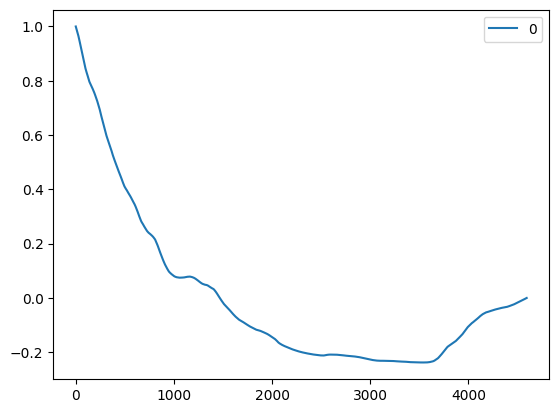

In [11]:
b = pd.DataFrame(a)
b.plot()